# 1. Interpolation

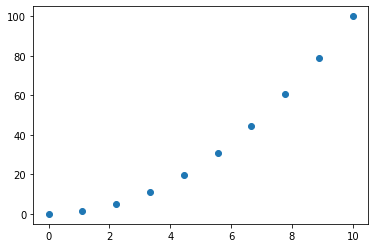

In [7]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,10,10)
y= x**2
plt.scatter(x,y)

In [8]:
from scipy.interpolate import interp1d

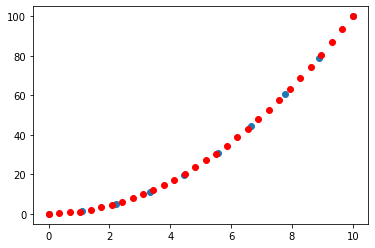

In [9]:
f = interp1d(x,y, kind='linear')

new_x = np.linspace(0,10,30)
result = f(new_x)

plt.scatter(x,y)
plt.scatter(new_x,result,c='r')

## 2. Optimisation

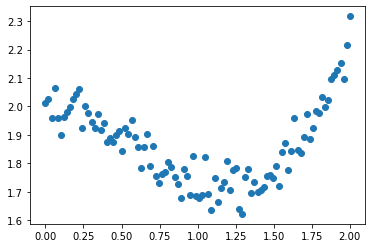

In [10]:
x = np.linspace(0,2,100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x,y)

In [11]:
def f(x, a, b, c, d):
    return a * x**3 + b * x**2 +c*x+d

In [12]:
from scipy import optimize

In [13]:
params, param_cov = optimize.curve_fit(f,x,y)

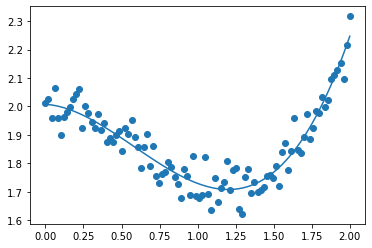

In [14]:
plt.scatter(x,y)
plt.plot(x, f(x,params[0],params[1],params[2], params[3]))

## Minimisation

In [15]:
def f(x):
    return x**2 + 15*np.sin(x)

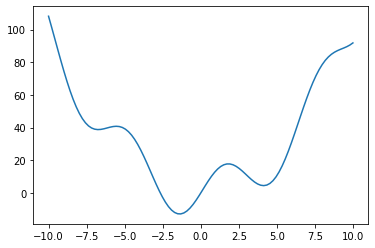

In [16]:
x = np.linspace(-10,10,100)
plt.plot(x, f(x))

In [24]:
x0 = -5
result = optimize.minimize(f, x0=x0).x

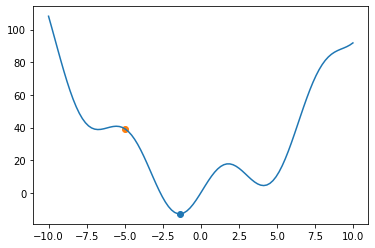

In [27]:
plt.plot(x, f(x))
plt.scatter(result, f(result))
plt.scatter(x0, f(x0))
plt.show()

## Traitement de signal

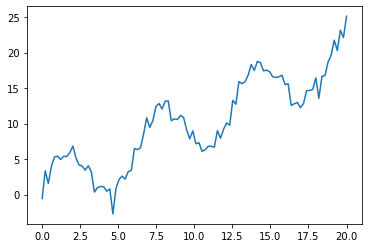

In [28]:
x = np.linspace(0,20,100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x,y)

In [29]:
from scipy import signal

In [30]:
new_y = signal.detrend(y)

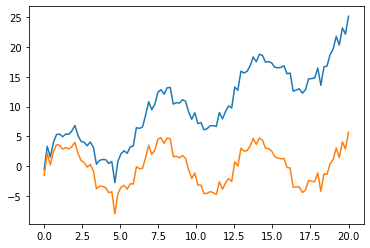

In [31]:
plt.plot(x,y)
plt.plot(x,new_y)

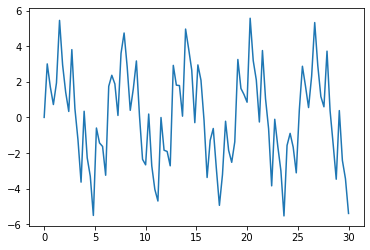

In [35]:
x = np.linspace(0,30,100)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x,y)

In [36]:
from scipy import fftpack

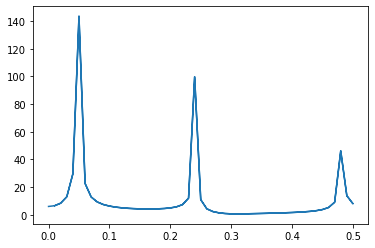

In [39]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

In [40]:
# Exemple de filtre appliqué avec fourier

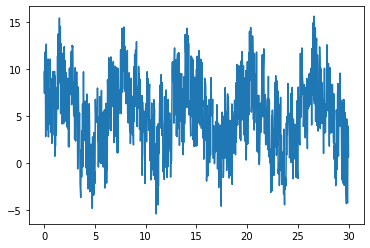

In [42]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x,y)

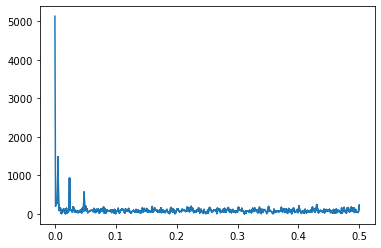

In [43]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

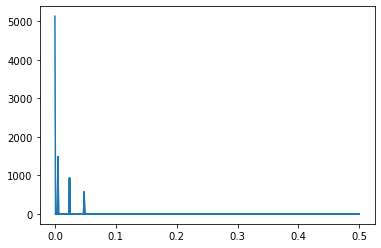

In [45]:
#filtrer
fourier[power<400] = 0
plt.plot(np.abs(frequences), np.abs(fourier))

In [46]:
#transformation de fourier inverse
filter_signal = fftpack.ifft(fourier)

C:\Users\Toufik\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


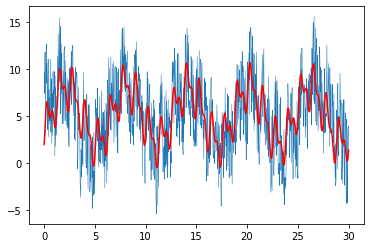

In [51]:
plt.figure()
plt.plot(x,y, lw=0.5)
plt.plot(x,filter_signal, c='r')
plt.show()

## Traitement d'images

In [52]:
from scipy import ndimage

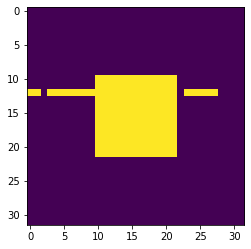

In [56]:
np.random.seed(0)
X = np.zeros((32,32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0.32,30), np.random.randint(0,32,30)] = 1
plt.imshow(X)

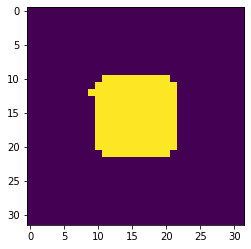

In [57]:
opon_x = ndimage.binary_opening(X)
plt.imshow(opon_x)

(689, 879)

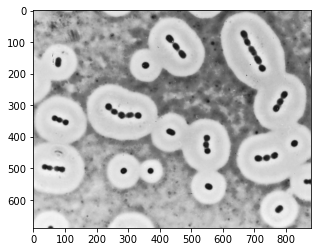

In [86]:
image = plt.imread('bacteria.jpg')
image = image[:,:,0]
plt.imshow(image,cmap='gray')
image.shape

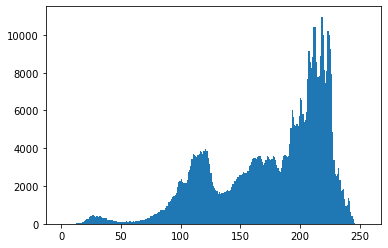

In [73]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

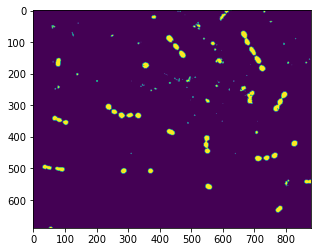

In [87]:
image = image <75
plt.imshow(image)

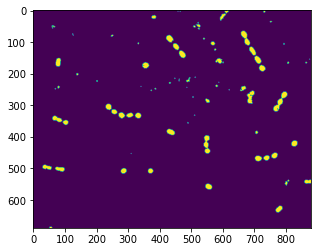

In [92]:
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)

In [93]:
#groupe de bacterie
label_image, n_labels = ndimage.label(open_x)
print(n_labels)

85


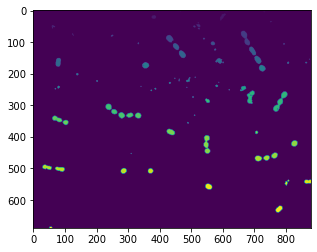

In [94]:
plt.imshow(label_image)

In [95]:
#la somme de pixels qu'il y a dans chaque groupe donc la taille de chaque bacterie (relatif)

In [96]:
sizes = ndimage.sum(open_x, label_image, range(n_labels))

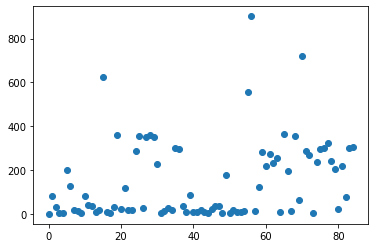

In [98]:
plt.scatter(range(n_labels), sizes)